# Convolutional Neural Network Architecture
![Untitled%20Diagram.png](attachment:Untitled%20Diagram.png)

In [1]:
import pandas as pd
import os
import numpy as np 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load('/content/drive/MyDrive/Covid_Detect/data.npy')
target=np.load('/content/drive/MyDrive/Covid_Detect/target.npy')

In [17]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)       

In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 15s 136ms/step - loss: 0.5503 - accuracy: 0.7617 - val_loss: 0.1971 - val_accuracy: 0.9435
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
50/50 [==============================] - 6s 112ms/step - loss: 0.1847 - accuracy: 0.9325 - val_loss: 0.1951 - val_accuracy: 0.9266
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
50/50 [==============================] - 6s 112ms/step - loss: 0.1282 - accuracy: 0.9626 - val_loss: 0.1096 - val_accuracy: 0.9548
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
50/50 [==============================] - 6s 113ms/step - loss: 0.1067 - accuracy: 0.9697 - val_loss: 0.0863 - val_accuracy: 0.9548
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
50/50 [==============================] - 6s 113ms/step - loss: 0.0909 - accuracy: 0.9770 - val_loss: 0.0783 - val_accuracy: 0.9605
INFO:tensorflow:Assets written to: model-005.model/assets

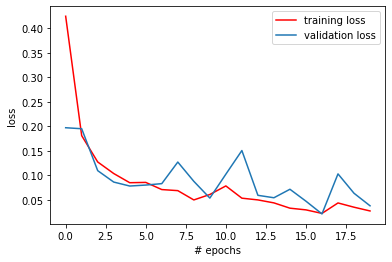

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

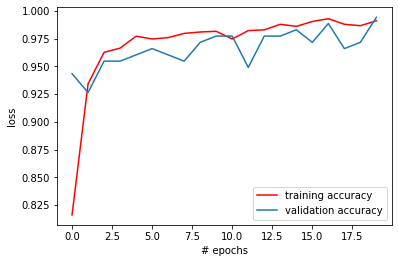

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 0s 66ms/step - loss: 0.0089 - accuracy: 1.0000
[0.008855718187987804, 1.0]
